In [2]:
import opendatasets as od
import pandas

# od.download(
# 	"https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset")


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

count the number of images in the respective classes <br>
0 - Brain Tumout <br>
1 - Healthey

In [5]:
ROOT_DIR = 'C:/Users/ashen/Downloads/ML-projects/brain-tumor-mri-dataset/Training'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

In [6]:
number_of_images.items()

dict_items([('glioma', 1321), ('meningioma', 1339), ('notumor', 1595), ('pituitary', 1457)])

### We will split the data such that ###

* 70% for Train data
* 15% for Validation
* 15% for Testing


## Model Build ##

In [16]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
import keras

### CNN Model ###

In [8]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [10]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

#### Preparing our data using Data Generator ####

In [17]:
def preprocessingImages1(path):
    ## input :path
    ## output: Pre processed images
    image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, preprocessing_function= preprocess_input, horizontal_flip=True)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

    return image

In [18]:
path = 'C:/Users/ashen/Downloads/ML-projects/brain-tumor-mri-dataset/Training'
train_data = preprocessingImages1(path)

Found 5712 images belonging to 4 classes.


In [19]:
def preprocessingImages2(path):
    ## input :path
    ## output: Pre processed images
    image_data = ImageDataGenerator(preprocessing_function= preprocess_input)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=256, class_mode='binary')

    return image

In [20]:
path = 'C:/Users/ashen/Downloads/ML-projects/brain-tumor-mri-dataset/Testing'
test_data = preprocessingImages2(path)

Found 1311 images belonging to 4 classes.


In [21]:
path = 'C:/Users/ashen/Downloads/ML-projects/brain-tumor-mri-dataset/Testing'
val_data = preprocessingImages2(path)

Found 1311 images belonging to 4 classes.


#### Early stoping and model check point ####

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Early stopping

es = EarlyStopping(monitor ="val_accuracy", min_delta=0.01, patience=6, verbose=1, mode="auto")

## Model check point

mc= ModelCheckpoint(monitor ="val_accuracy", filepath='./bestmodel.h5', verbose=1, save_best_only=True, mode="auto")

cd = [es, mc]

#### Model Training ####

In [17]:
history = model.fit_generator(generator= train_data, 
                              steps_per_epoch=8, 
                              epochs=30, 
                              verbose=1, 
                              validation_data=val_data, 
                              validation_steps=16, 
                              callbacks=cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: -117.1803 - accuracy: 0.2188
Epoch 1: val_accuracy improved from -inf to 0.23047, saving model to .\bestmodel.h5
8/8 [==============================] - 12s 1s/step - loss: -117.1803 - accuracy: 0.2188 - val_loss: -729.0561 - val_accuracy: 0.2305
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: -6115.4199 - accuracy: 0.2344
Epoch 2: val_accuracy improved from 0.23047 to 0.23438, saving model to .\bestmodel.h5
8/8 [==============================] - 11s 1s/step - loss: -6115.4199 - accuracy: 0.2344 - val_loss: -18021.8770 - val_accuracy: 0.2344
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: -79287.5156 - accuracy: 0.1992
Epoch 3: val_accuracy did not improve from 0.23438
8/8 [==============================] - 10s 1s/step - loss: -79287.5156 - accuracy: 0.1992 - val_loss: -174613.0312 - val_accuracy: 0.2266
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: -555742.1250 - ac

#### Model Graphical Interpretation ####

In [22]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

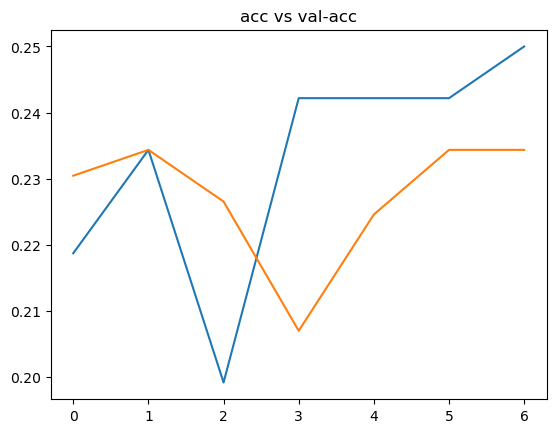

In [23]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

plt.title("acc vs val-acc")
plt.show()

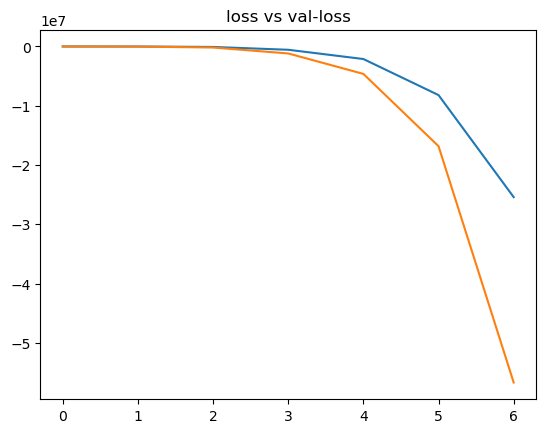

In [24]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])

plt.title("loss vs val-loss")
plt.show()

### Model Accuracy ###

In [26]:
from keras.models import load_model
model = load_model('C:/Users/ashen/Downloads/ML-projects/bestmodel.h5')

### Model Acuuracy ###

In [28]:
acc = model.evaluate_generator(test_data)[1]

print(f"The accuracy of our model is {acc}")

The accuracy of our model is 0.23340961337089539


In [29]:
from keras.preprocessing.image import load_img, img_to_array

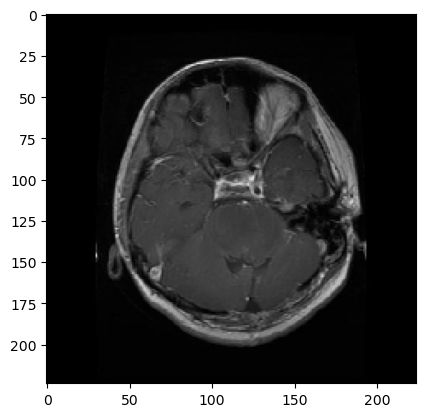

1/1 [==============================] - 0s 24ms/step
The MRI detect meningioma


In [42]:
path = 'C:/Users/ashen/Downloads/ML-projects/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0010.jpg'

img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)

pred = model.predict(input_arr)[0][0]
pred

if pred==0:
    print("The MRI detect glioma")

elif pred==1:
    print("The MRI detect meningioma")
    
elif pred==2:
    print("The MRI detect notumor")

else:
    print("The MRI detect pituitary")



In [39]:
train_data.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

## Model Training ## 
* We are not going to import convolutional or max pool layers. Because all of that is taken here by the pre-trained model
* We had used Sequential at last time. But now we are using functional API  

In [10]:
import keras
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet

Now we have to pre-process the image. That means some images and some models do the regularization by dividing image by (1/255).
* But few images take the mean and average and divide it.
* keras.applications package we can import whichever model I want. So we have densenet, efficient net, inception v2, mobile net and other of architectures.
* We are not going to rescal, it is automatically done by the preprocessing at the preprocessingImages2

We have to provide the input shape here <br>
We downloaded the pre-trained model

In [3]:
base_model = MobileNet(input_shape=(224,224,3), include_top = False)

17225924/17225924 [==============================] - 4s 0us/step


Now we are going to make sure that we don't want to retrain this model again. <br>
If we don't want to retrain.

In [4]:
for layer in base_model.layers:
    layer.trainable = False

Now we are going to club our base model with our custom model. <br>
* Now we have to provide the input to the Flattened layer for the input to the flattened layer base_model.output. Which is the convolution layer.
* The inputs of model is basically base model dot inputs and output be X

In [5]:
X = Flatten()(base_model.output)
X = Dense(units=1, activation="sigmoid",)(X)

model = Model(base_model.input, X)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [22]:
model.compile(optimizer ='rmsprop', loss=keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [23]:
## Call Back

from keras.callbacks import ModelCheckpoint, EarlyStopping

## Model Checkpoint
mc = ModelCheckpoint(filepath='bestmodel.h5', monitor='val_accuracy', verbose=1, save_best_model=True)

## Early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1)

cb = [mc,es]

In [25]:
history2 = model.fit_generator(train_data, 
                               steps_per_epoch=8, 
                               epochs= 30, 
                               validation_data=val_data, 
                               validation_steps=16, callbacks=cb)

C:\Users\ashen\AppData\Local\Temp\ipykernel_22636\2298518211.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model.fit_generator(train_data,


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: -97.5334 - accuracy: 0.1992WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 16 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: saving model to bestmodel.h5
8/8 [==============================] - 17s 2s/step - loss: -97.5334 - accuracy: 0.1992 - val_loss: -167.1668 - val_accuracy: 0.2334
Epoch 2/30


c:\Users\ashen\miniconda3\envs\mlproject\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - ETA: 0s - loss: -229.5840 - accuracy: 0.2383
Epoch 2: saving model to bestmodel.h5
8/8 [==============================] - 4s 435ms/step - loss: -229.5840 - accuracy: 0.2383
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: -310.8910 - accuracy: 0.2656
Epoch 3: saving model to bestmodel.h5
8/8 [==============================] - 4s 444ms/step - loss: -310.8910 - accuracy: 0.2656
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: -414.7243 - accuracy: 0.3008
Epoch 4: saving model to bestmodel.h5
8/8 [==============================] - 4s 431ms/step - loss: -414.7243 - accuracy: 0.3008
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: -542.8738 - accuracy: 0.2500
Epoch 5: saving model to bestmodel.h5
8/8 [==============================] - 4s 422ms/step - loss: -542.8738 - accuracy: 0.2500
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: -761.4266 - accuracy: 0.2422
Epoch 6: saving model to

#### Load the best fit model ####

In [26]:
model = load_model('C:/Users/ashen/Downloads/ML-projects/bestmodel.h5')

In [28]:
acc = model.evaluate(test_data)[1]
print(f'Our model accuracy is {acc}')

6/6 [==============================] - 12s 2s/step - loss: -3198.0266 - accuracy: 0.2334
Our model accuracy is 0.23340961337089539
